In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn

from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.metrics import classification_report

In [2]:
%matplotlib inline
rcParams['figure.figsize'] = 10, 8
sb.set_style('whitegrid')

In [3]:
HR = pd.read_csv(r"C:\Users\EMT\Downloads\HR-Employee-Attrition.csv")
HR.columns = ['Age','Attrition','BusinessTravel','DailyRate','Department','DistanceFromHome','Education','EducationField','EmployeeCount','EmployeeNumber','EnvironmentSatisfaction','Gender','HourlyRate','JobInvolvement','JobLevel','JobRole','JobSatisfaction','MaritalStatus','MonthlyIncome','MonthlyRate','NumCompaniesWorked','Over18','OverTime','PercentSalaryHike','PerformanceRating','RelationshipSatisfaction','StandardHours','StockOptionLevel','TotalWorkingYears','TrainingTimesLastYear','WorkLifeBalance','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']
HR.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


<AxesSubplot:xlabel='Attrition', ylabel='count'>

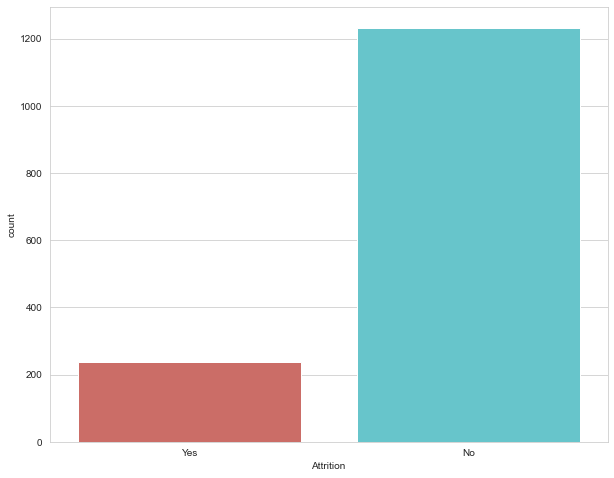

In [4]:
sb.countplot(x='Attrition',data=HR, palette='hls')

As we see from this drawing the Attrition variable is binary (0 -Attrition  / 1 - Not Attrition)
, the number of Attrition employees is 237 compared to 1233.
Most are not Attrition, and this is a good percentage.

<AxesSubplot:xlabel='Gender', ylabel='count'>

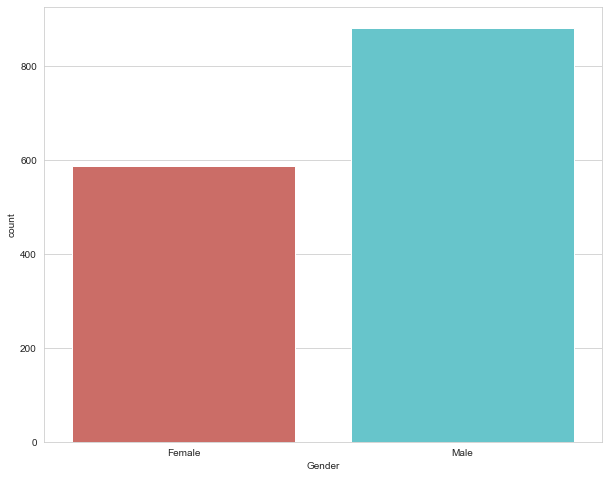

In [5]:
sb.countplot(x='Gender',data=HR, palette='hls')

Also here the variable is gender, which is a binary variable that accepts only two values: female, male, and it becomes clear to us that the number of males exceeds the number of females

In [6]:
HR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

<AxesSubplot:xlabel='EnvironmentSatisfaction', ylabel='Age'>

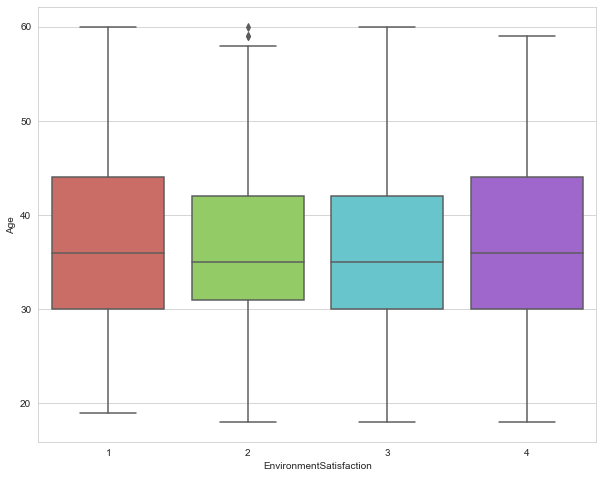

In [7]:
sb.boxplot(x='EnvironmentSatisfaction', y='Age', data=HR, palette='hls')

Through this graph we will see how the age of the employees is related to the satisfaction with the environment.

<AxesSubplot:xlabel='Gender', ylabel='YearsAtCompany'>

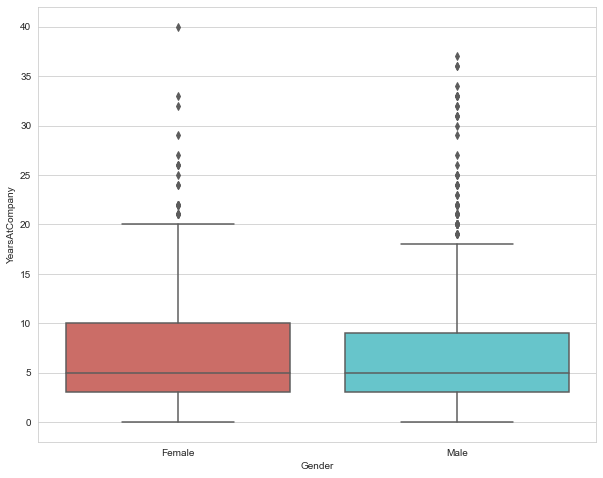

In [9]:
sb.boxplot(x='Gender', y='YearsAtCompany', data=HR, palette='hls')

Here we see the relationship between the employee's gender and the extent of his connection to the company, and as we see, the proportions are close between women and men and the number of years of work in the company

In [10]:
HR.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


<AxesSubplot:>

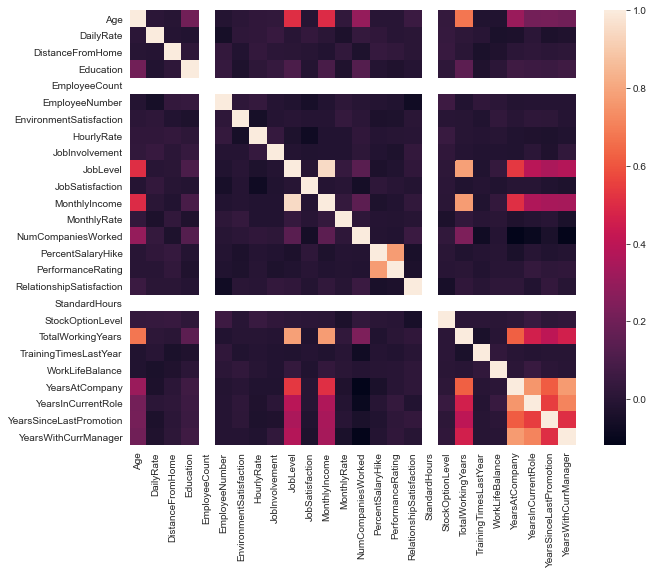

In [11]:
sb.heatmap(HR.corr()) 

Now we have a data set with all the variables, and we see how independent the data is among them.

<AxesSubplot:xlabel='Department', ylabel='count'>

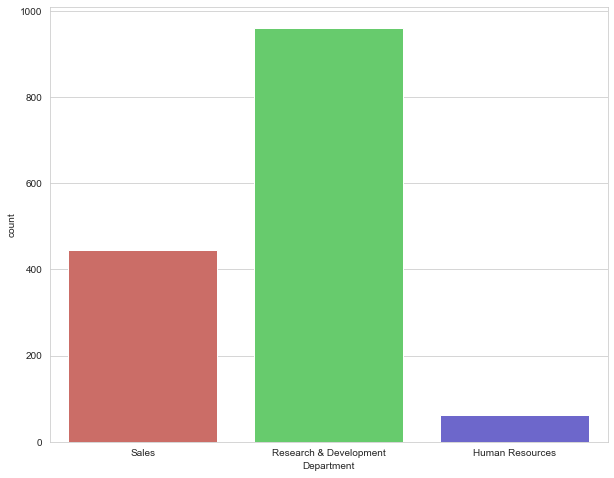

In [12]:
sb.countplot(x='Department',data=HR, palette='hls')

As for this drawing, it is clear to us that the employees here come from three departments only
(Sales,Research & Development, Human Resources)
The proportion was the highest for the Research & Development	department
While Sales is the second and lowest percentage of employees are HR employees.